# **Welcome To Breast Cancer Wisconsin (Diagnostic) Projects** **bold text**

![](https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg)

### Attribute Information

| #  | Feature Name       | Description  |
|----|-------------------|-------------|
| 1  | ID number         | Unique identifier |
| 2  | Diagnosis        | M = malignant, B = benign |
| 3  | Mean Radius      | Mean of distances from center to points on the perimeter |
| 4  | Mean Texture     | Standard deviation of gray-scale values |
| 5  | Mean Perimeter   | Perimeter of the cell nucleus |
| 6  | Mean Area        | Area of the cell nucleus |
| 7  | Mean Smoothness  | Local variation in radius lengths |
| 8  | Mean Compactness | (perimeter² / area) - 1.0 |
| 9  | Mean Concavity   | Severity of concave portions of the contour |
| 10 | Mean Concave Points | Number of concave portions of the contour |
| 11 | Mean Symmetry    | Symmetry of the cell nucleus |
| 12 | Mean Fractal Dimension | "Coastline approximation" - 1 |
| 13 | Radius SE        | Standard error of radius |
| 14 | Texture SE       | Standard error of texture |
| 15 | Perimeter SE     | Standard error of perimeter |
| 16 | Area SE         | Standard error of area |
| 17 | Smoothness SE    | Standard error of smoothness |
| 18 | Compactness SE   | Standard error of compactness |
| 19 | Concavity SE     | Standard error of concavity |
| 20 | Concave Points SE | Standard error of concave points |
| 21 | Symmetry SE      | Standard error of symmetry |
| 22 | Fractal Dimension SE | Standard error of fractal dimension |
| 23 | Worst Radius     | Largest (mean of three largest values) radius |
| 24 | Worst Texture    | Largest texture value |
| 25 | Worst Perimeter  | Largest perimeter value |
| 26 | Worst Area       | Largest area value |
| 27 | Worst Smoothness | Largest smoothness value |
| 28 | Worst Compactness | Largest compactness value |
| 29 | Worst Concavity  | Largest concavity value |
| 30 | Worst Concave Points | Largest concave points value |
| 31 | Worst Symmetry   | Largest symmetry value |
| 32 | Worst Fractal Dimension | Largest fractal dimension value |

#### Additional Information:
- **No missing values**
- **Class distribution:** 357 benign, 212 malignant


## Import Needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Warnings
import warnings
warnings.filterwarnings('ignore')

## Rread The Data

In [ ]:
df = pd.read_csv('D:\Year-3 Term-3\Deep Learning\CA -4 Assingment\data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Explore the Data

In [3]:
# Null Values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# Check Duplicates
df.duplicated().sum()

0

In [5]:
# drop unneeded Column
df.drop(columns=['Unnamed: 32','id'], axis=1, inplace=True)

In [6]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# Data Description
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Date Preprocessing

### Check / Handling outliers

In [8]:
# Boxplot function to check outliers for all columns
def BoxPlotAllColumns(df):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(df.columns[1:], start=1):  
        plt.subplot(6, 5, i)
        sns.boxplot(y=df[col])  # Fix: Using 'y' argument
        plt.title(col)
    plt.tight_layout()
    plt.show()

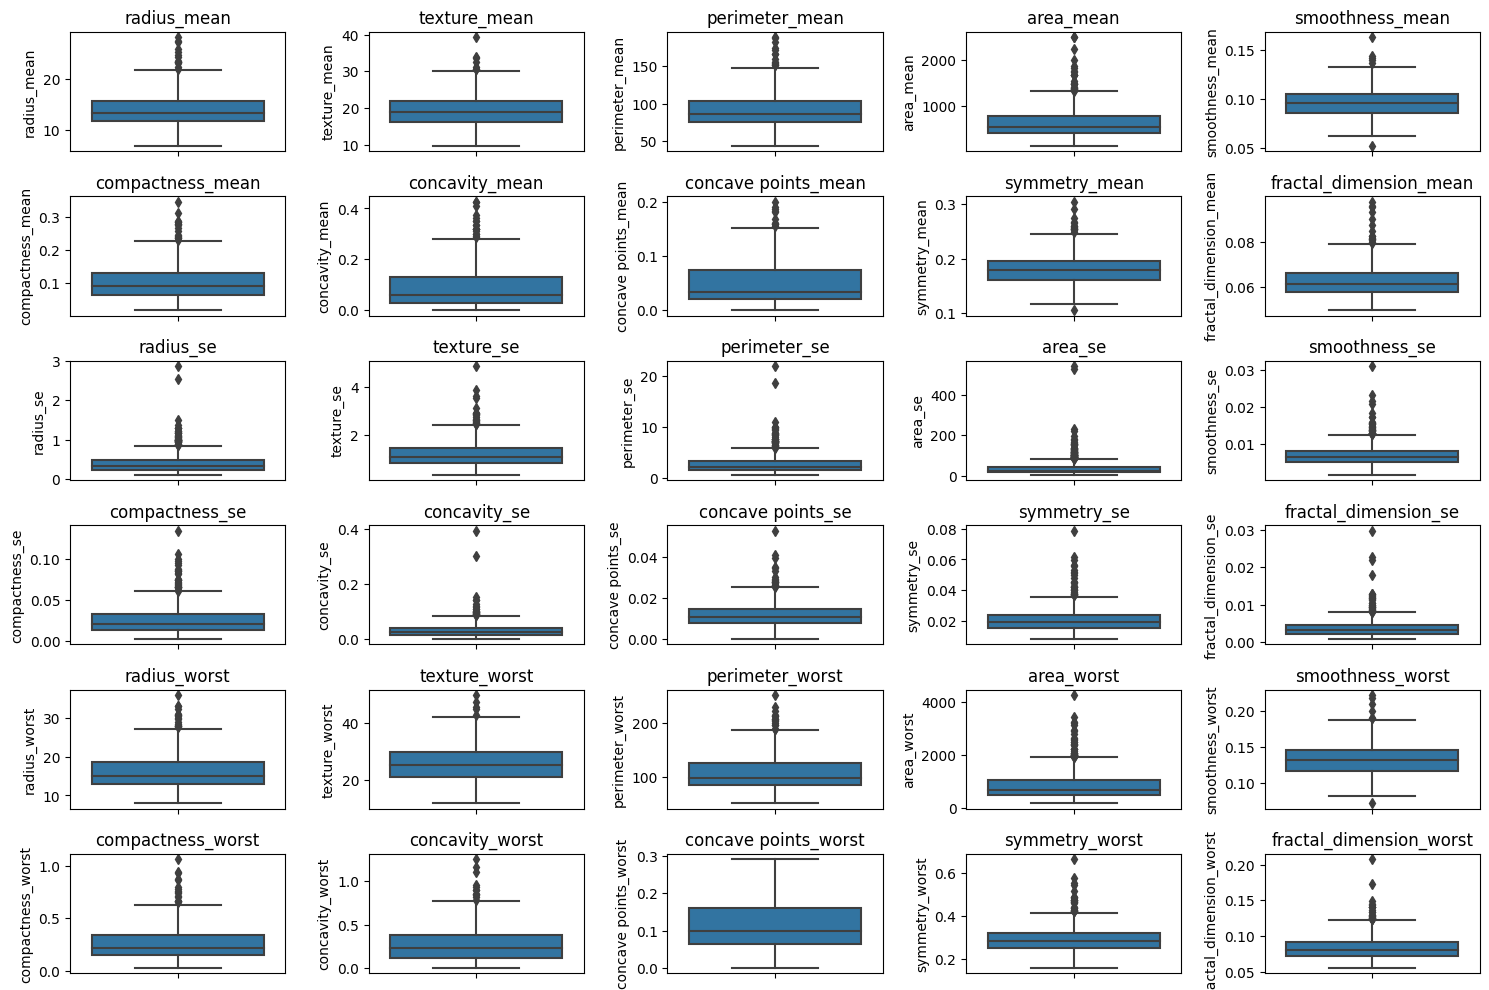

In [9]:
# Apply Function
BoxPlotAllColumns(df)

In [10]:
def HandleOutliers(df):
    for i, col in enumerate(df.columns[1:], start=1) :
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [11]:
# Apply the function
cleanDf = HandleOutliers(df)

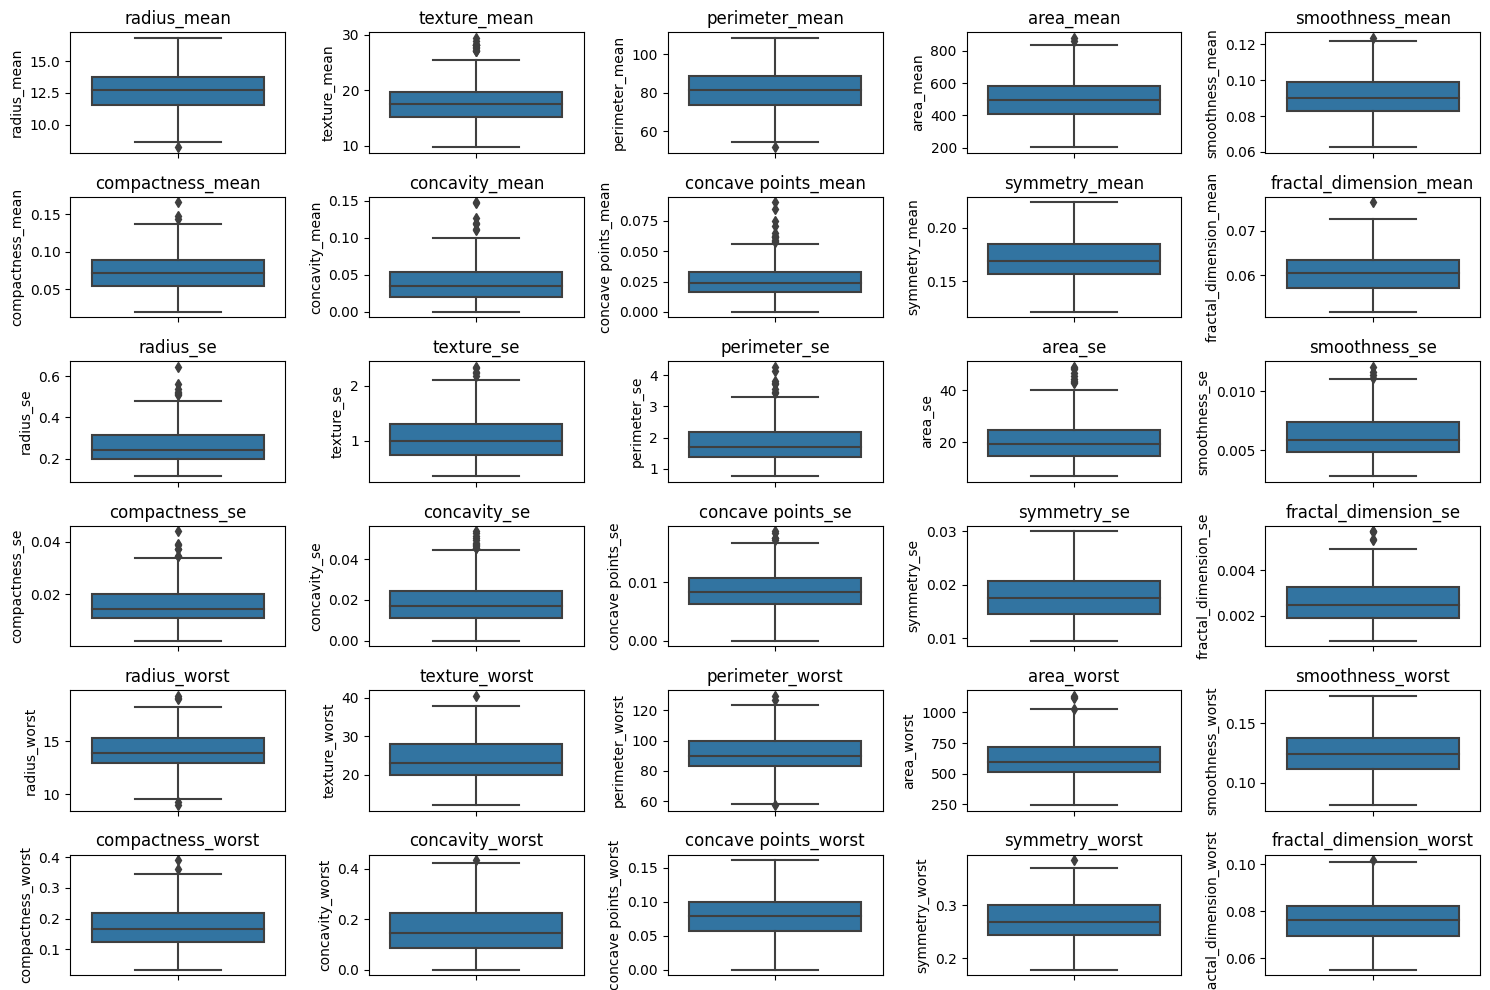

In [12]:
BoxPlotAllColumns(cleanDf)

### Split Data

In [13]:
# Split the data
X = cleanDf.drop('diagnosis', axis=1)
y = cleanDf['diagnosis']

In [14]:
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size=0.2 , random_state=42)

### Data Scaling  

In [15]:
# Scale the data
scaler = StandardScaler()
xtrainScaled = scaler.fit_transform(xtrain)
xtestScaled = scaler.transform(xtest)

## Modeling

In [16]:
Models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'XGBoost' : XGBClassifier()
}

In [17]:
# train the data overall models
for i in range(len(list(Models))):
    model = list(Models.values())[i]
    model.fit(xtrainScaled, ytrain.apply(lambda x : 1 if x == 'M' else 0))

In [18]:
# Test the date
for i in range(len(list(Models))):
    model = list(Models.values())[i]
    y_test_pred = model.predict(xtestScaled)

In [19]:
# evaluate the data
for i in range(len(list(Models))):
    model = list(Models.values())[i]
    print(list(Models.keys())[i])
    print('Train Score is : ' , model.score(xtrainScaled,  ytrain.apply(lambda x : 1 if x == 'M' else 0)))
    print('Test Score is : ' , model.score(xtestScaled, ytest.apply(lambda x : 1 if x == 'M' else 0)))
    print('Accuracy Score is : ' , accuracy_score(ytest.apply(lambda x : 1 if x == 'M' else 0), y_test_pred))
    print('Classification Report is : \n', classification_report(ytest.apply(lambda x : 1 if x == 'M' else 0), y_test_pred))
    print("-------------------------------------------------------------------------------")

Logistic Regression
Train Score is :  0.9819004524886877
Test Score is :  0.9642857142857143
Accuracy Score is :  0.9464285714285714
Classification Report is : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.50      0.33      0.40         3

    accuracy                           0.95        56
   macro avg       0.73      0.66      0.69        56
weighted avg       0.94      0.95      0.94        56

-------------------------------------------------------------------------------
Decision Tree
Train Score is :  1.0
Test Score is :  0.8571428571428571
Accuracy Score is :  0.9464285714285714
Classification Report is : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.50      0.33      0.40         3

    accuracy                           0.95        56
   macro avg       0.73      0.66      0.69        56
weighted avg      

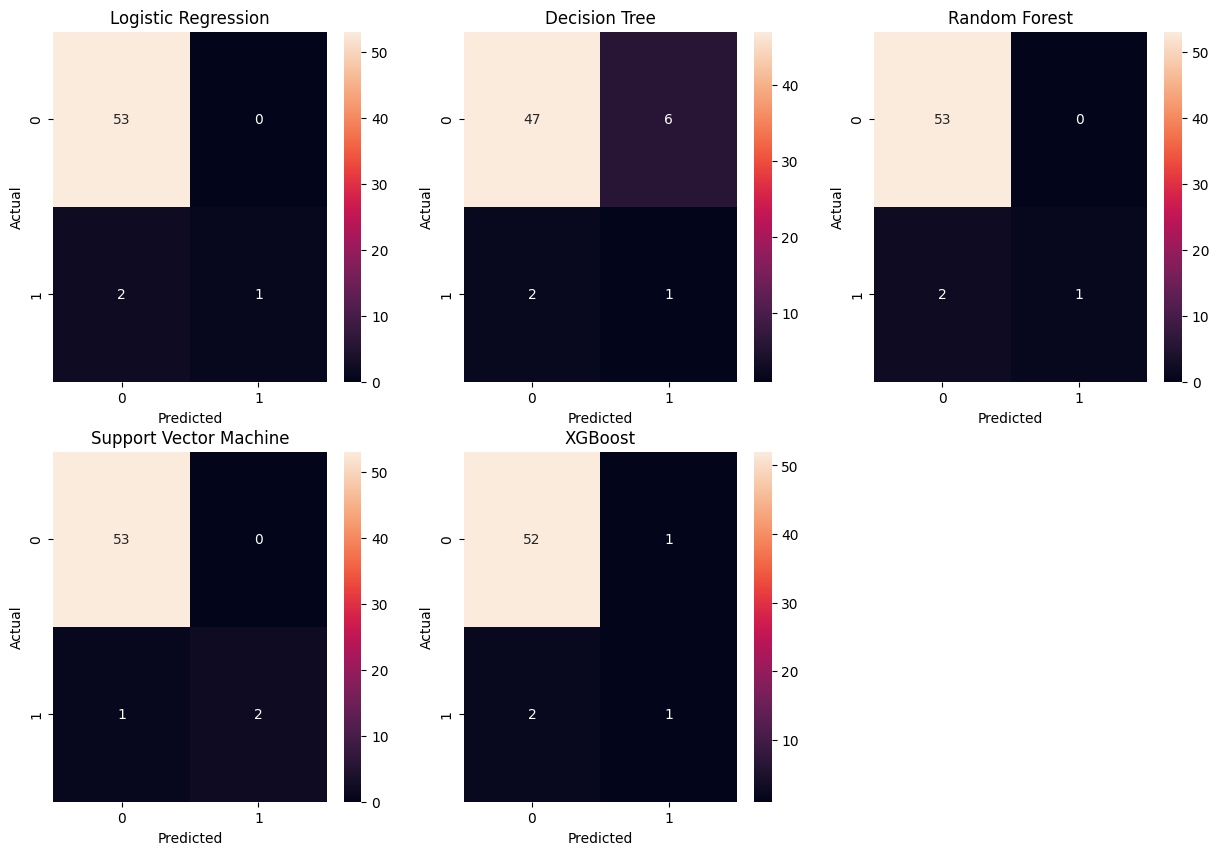

In [20]:
# Sub Plot Confusion Matrix
plt.figure(figsize=(15,10))
for i in range(len(list(Models))):
    model = list(Models.values())[i]
    y_test_pred = model.predict(xtestScaled)
    plt.subplot(2,3,i+1)
    plt.title(list(Models.keys())[i])
    cm = confusion_matrix(ytest.apply(lambda x : 1 if x == 'M' else 0), y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()


## ANN

In [21]:
# Build ANN
annModel = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),  # Input Layer
    Dense(32, activation='relu'),  # Hidden Layer
    Dense(1, activation='sigmoid')  # Output Layer for Binary Classification
])

In [22]:
# compile ANN
annModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train ANN
annModel.fit(xtrainScaled, ytrain.apply(lambda x : 1 if x == 'M' else 0), epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6245 - loss: 0.6529 - val_accuracy: 0.8889 - val_loss: 0.3789
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9403 - loss: 0.3303 - val_accuracy: 0.9111 - val_loss: 0.2605
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9195 - loss: 0.2707 - val_accuracy: 0.9778 - val_loss: 0.2062
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9453 - loss: 0.1848 - val_accuracy: 0.9778 - val_loss: 0.1815
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.1455 - val_accuracy: 0.9778 - val_loss: 0.1729
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9464 - loss: 0.1303 - val_accuracy: 0.9778 - val_loss: 0.1690
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9336 - loss: 0.1441 - val_accuracy: 0.9778 - val_loss: 0.1682
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.0970 - val_accuracy: 0.9778 - val_loss

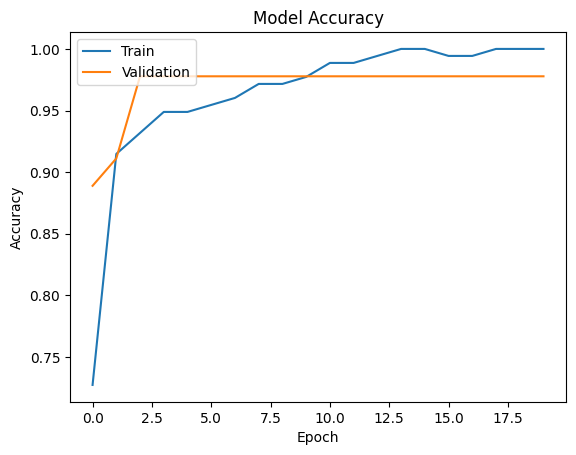

In [24]:
# Plot ANN Accuracy
plt.plot(annModel.history.history['accuracy'])
plt.plot(annModel.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# Model Summary
annModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)